In [1]:
import sys 
sys.path.append("..") # this is to import elm.py
import elm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import scipy
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
def sift_features(df,dislike_fea=[]):
    '''
    function to sift the features,in order to figure out that what feature have great influence to the prediction
    @param
    * dislike_fea: (list),the elements of the list is str
    '''
    X=df[df.columns.difference(['class','source','target']+dislike_fea)]
    y=df['class'].values
    ss=StandardScaler()
    X_norm=ss.fit_transform(X)
    return X_norm,y

## test if the ELM is correct

In [3]:
stdsc = StandardScaler()
# load dataset
iris = load_iris()
irx, iry = stdsc.fit_transform(iris.data), iris.target
x_train, x_test, y_train, y_test = train_test_split(irx, iry, test_size=0.2)
# built model and train
model = elm.elm(hidden_units=35, activation_function='relu', random_type='normal', x=x_train, y=y_train, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
# print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
# print('classifier running time:', running_time)

# test
# prediction = model.predict(x_test)
# print("classifier test prediction:", prediction)
print('classifier test accuracy:', model.score(x_test, y_test))

classifier train accuracy: 0.9666666666666667
classifier test accuracy: 0.9333333333333333


# 加载训练数据

In [5]:
train_list=[]
train_path='df_list\\train'
for df_name in os.listdir(train_path):
    file_path=os.path.join(train_path,df_name)
    tmp_df=pd.read_csv(file_path,index_col=0)
    train_list.append(tmp_df)

print('nums of train set: ', len(train_list))
train_list[0]

nums of train set:  10


,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,Arizona,AirForce,1,0.834065,0.337600,0.834065,2.0,0.927273,2.0,0.337600,0.181818,0.181818,0.200000,0.105263,0.018182,0.789091,0.181818,0.190693,0.190476
1,Buffalo,CentralMichigan,1,2.154210,0.893474,4.291159,25.0,2.000000,5.0,1.774579,0.972727,0.454545,0.454545,0.294118,0.041322,1.802469,0.490909,0.454545,0.454545
2,Virginia,NewMexicoState,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ArkansasState,Minnesota,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Michigan,Hawaii,1,0.819462,0.327047,0.000000,0.0,0.893939,2.0,0.000000,0.000000,0.181818,0.181818,0.100000,0.016529,0.540220,0.174242,0.181818,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,Clemson,Maryland,1,2.939148,1.195784,17.634889,147.0,3.823232,7.0,7.174707,3.881818,0.636364,0.700000,0.500000,0.063636,5.500553,0.646970,0.667424,0.666667
856,NevadaLasVegas,Hawaii,1,0.402430,0.158247,0.000000,0.0,0.484848,1.0,0.000000,0.000000,0.083333,0.090909,0.045455,0.007576,0.484848,0.083333,0.087039,0.086957
857,WakeForest,Maryland,1,2.939148,1.195784,17.634889,147.0,3.778788,7.0,7.174707,3.881818,0.636364,0.700000,0.500000,0.063636,5.536872,0.646970,0.667424,0.666667
858,OregonState,California,1,2.487592,1.002248,9.950366,72.0,2.793939,6.0,4.008991,2.151515,0.545455,0.600000,0.400000,0.054545,3.407934,0.537879,0.572078,0.571429


In [83]:
# df_list=[]
# df_dir_path='df_list\\'
# for df_name in os.listdir(df_dir_path):
#     file_path=os.path.join(df_dir_path,df_name)
#     tmp_df=pd.read_csv(file_path,index_col=0)
#     df_list.append(tmp_df)
# df_graph=df_list[0]
# df_graph

# 看看特征之间的相关性如何

<AxesSubplot:>

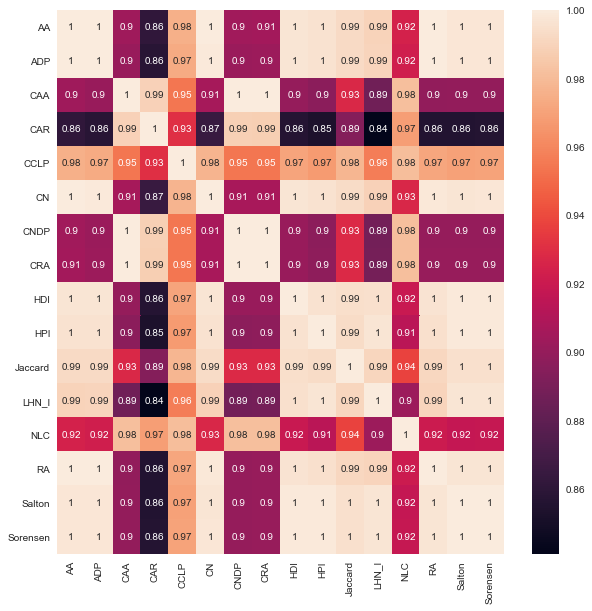

In [84]:
%matplotlib inline
complete_features=df_train.loc[:,df_train.columns.difference(['source','target','class'])]
# 绘制热力图
plt.figure(figsize=(10,10))
sns.heatmap(complete_features.corr(),annot=True)

## 特征分布图

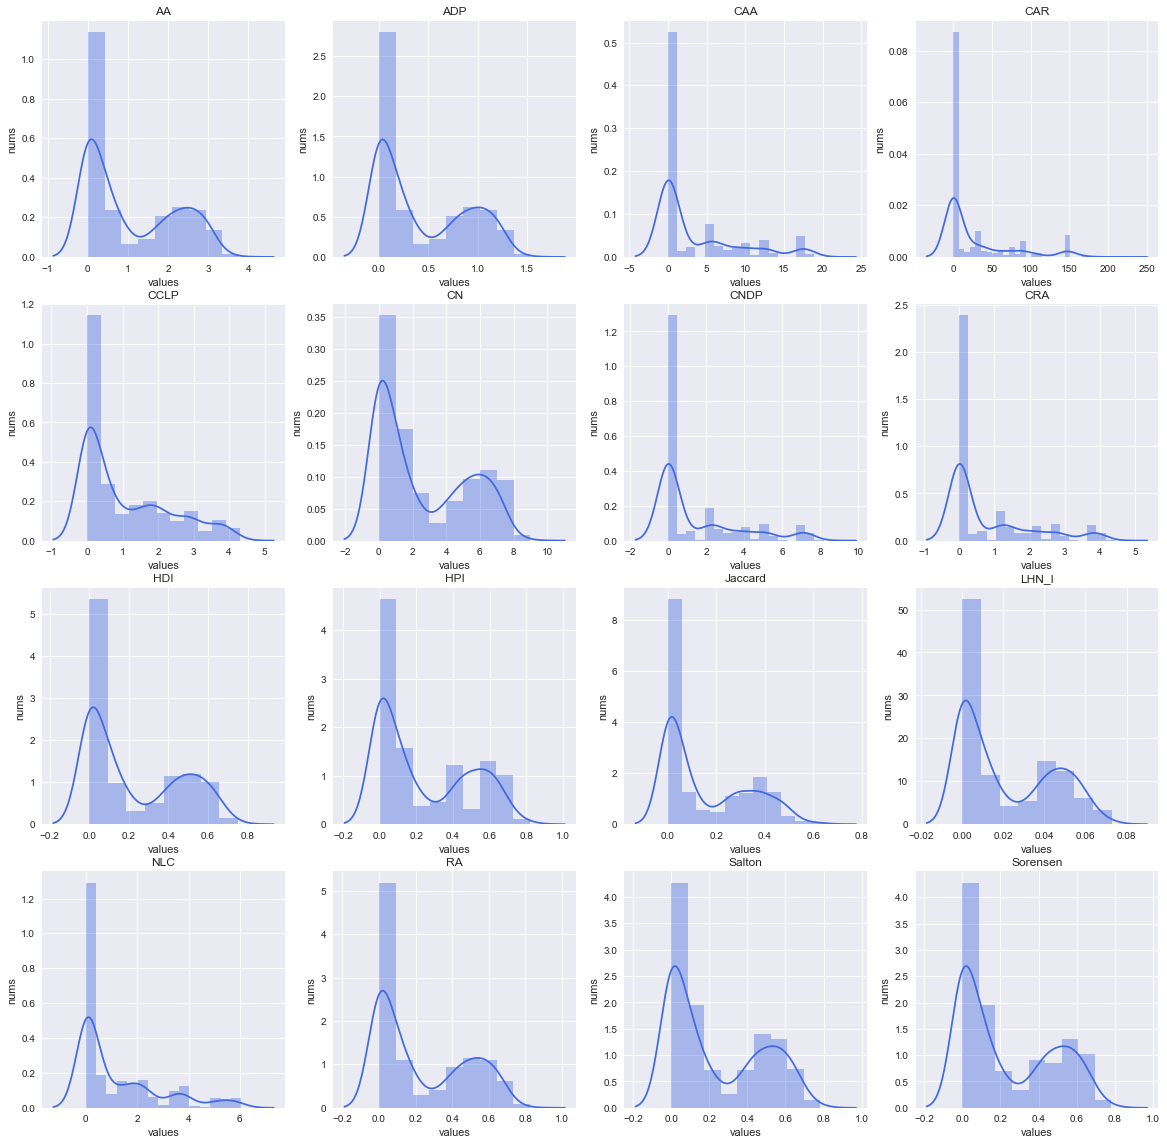

In [85]:
plt.style.use('seaborn')

features_set=list(complete_features.columns)
fig, axes = plt.subplots(ncols=4, nrows=4,figsize=[20,20])
for i, ax, fea in zip(range(16), axes.flat,features_set):
    ax.set_title(fea)
    ax.set_xlabel('values')
    ax.set_ylabel('nums')
    sns.distplot(complete_features[fea].values,
        hist=True,kde=True, ax=ax,color='royalblue')
plt.show()


# 删掉相关系太高的特征

In [86]:
# df_=df_graph.drop(['source','target','class'],axis=1)
# corr_matrix=df_.corr()
# upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
# upper

In [87]:
# to_drop=[column for column in upper.columns if any(upper[column]>0.95)]
# print(to_drop)

# 训练模型

In [175]:
# 训练集的数据
print('train_list len: {0}\ntrain_df shape: {1}'.format(len(train_list),train_list[0].shape))
print('features :',train_list[0].columns.values)

train_list len: 10
train_df shape: (858, 19)
features : ['source' 'target' 'class' 'AA' 'ADP' 'CAA' 'CAR' 'CCLP' 'CN' 'CNDP' 'CRA'
 'HDI' 'HPI' 'Jaccard' 'LHN_I' 'NLC' 'RA' 'Salton' 'Sorensen']


In [176]:
train_tuple_list=[sift_features(df) for df in train_list]# 处理train_list的数据，得到归一化后的X，和y
X_train_list=[items[0] for items in train_tuple_list]
y_train_list=[items[1] for items in train_tuple_list]

print('X: ',X_train_list[0].shape)
print('y: ',y_train_list[0].shape)

X:  (858, 16)
y:  (858,)


In [182]:
# 训练多个模型
model_list=[]
hidden_units_=35
C=0.1
for i, (x_train,y_train) in enumerate(zip(X_train_list,y_train_list)):
    tmp_model = elm.elm(
        hidden_units=hidden_units_, 
        activation_function='sigmoid', 
        random_type='normal', 
        x=x_train, y=y_train, 
        C=C, elm_type='clf'
    )
    tmp_model.fit('solution2')
    model_list.append(tmp_model)

### 测试模型准确率

In [183]:
for i in range(len(model_list)):
    print('model {0} acc: {1}'.format(i,model_list[i].score(X_train_list[i],y_train_list[i])))

model 0 acc: 0.7937062937062938
model 1 acc: 0.8100233100233101
model 2 acc: 0.7937062937062938
model 3 acc: 0.7913752913752914
model 4 acc: 0.8041958041958042
model 5 acc: 0.7972027972027972
model 6 acc: 0.7937062937062938
model 7 acc: 0.7913752913752914
model 8 acc: 0.7948717948717948
model 9 acc: 0.789044289044289


## 绘制训练曲线

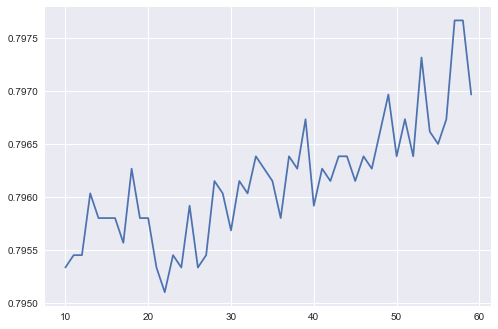

In [234]:
acc_list=[]
for hiddens in range(10,0):
    sum_acc=[]
    for x_train,y_train in zip(X_train_list,y_train_list):
        tmp_model = elm.elm(
            hidden_units=hiddens, 
            activation_function='sigmoid', 
            random_type='normal', 
            x=x_train, y=y_train, 
            C=C, elm_type='clf'
        )
        tmp_model.fit('solution2')
        tmp_score=tmp_model.score(x_train,y_train)
        sum_acc.append(tmp_score)
    acc_list.append(sum(sum_acc)/len(sum_acc))
plt.plot(list(range(10,60)),acc_list)

# 导入测试集

In [185]:
test_list=[]
test_path='df_list\\test'
for df_name in os.listdir(test_path):
    file_path=os.path.join(test_path,df_name)
    tmp_df=pd.read_csv(file_path,index_col=0)
    test_list.append(tmp_df)
# 控制测试集个数
test_list=test_list[:train_nums]

N=test_list[0]['class'].values.sum()
M=test_list[0].shape[0]-N
print('N: ',N)
print('M: ',M)
test_list[0]

N:  184
M:  184


,source,target,class,AA,ADP,CAA,CAR,CCLP,CN,CNDP,CRA,HDI,HPI,Jaccard,LHN_I,NLC,RA,Salton,Sorensen
0,SouthernMethodist,Hawaii,1,2.890021,1.160495,17.340127,147.0,3.612121,7.0,6.962970,3.727273,0.583333,0.636364,0.437500,0.053030,5.077355,0.621212,0.609272,0.608696
1,Kent,Pittsburgh,1,0.417032,0.168800,0.000000,0.0,0.381818,1.0,0.000000,0.000000,0.090909,0.100000,0.050000,0.009091,0.305455,0.090909,0.095346,0.095238
2,Kent,MiamiOhio,1,2.119686,0.868737,8.478745,50.0,2.030303,5.0,3.474948,1.890909,0.454545,0.500000,0.312500,0.045455,2.426824,0.472727,0.476731,0.476190
3,Kent,Ohio,1,2.953751,1.206337,10.963677,91.0,2.600000,7.0,4.475380,2.427273,0.700000,0.700000,0.538462,0.070000,2.640269,0.654545,0.700000,0.700000
4,Kent,Marshall,1,2.536719,1.037537,9.278285,66.0,2.313131,6.0,3.787812,2.054545,0.600000,0.600000,0.428571,0.060000,2.501100,0.563636,0.600000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,SouthernMississippi,LouisianaState,0,1.685392,0.687569,0.834065,4.0,1.434343,4.0,0.337600,0.181818,0.400000,0.400000,0.250000,0.040000,0.779304,0.372727,0.400000,0.400000
364,ArizonaState,Texas,0,0.417032,0.168800,0.000000,0.0,0.472727,1.0,0.000000,0.000000,0.090909,0.090909,0.047619,0.008264,0.283636,0.090909,0.090909,0.090909
365,Kent,Clemson,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
366,MiamiOhio,NewMexicoState,0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#  计算熵

In [186]:
test_tuple_list=[sift_features(df) for df in test_list]# 处理test_list，得到归一化后的X_test，和y_test
X_test_list=[items[0] for items in test_tuple_list]
y_test_list=[items[1] for items in test_tuple_list]

softmax_list=[]
for test_data in X_test_list:
    tmp_list=[]
    for model in model_list:
        tmp_res=model.predict_softmax(test_data)
        tmp_list.append(tmp_res)
    softmax_list.append(tmp_list)
softmax_list=np.array(softmax_list)

In [187]:
softmax_list.shape

(10, 10, 368, 2)

In [188]:
# 将K个ELM的预测结果取平均
softmax_list_mean=np.mean(softmax_list[:,:,:,:],axis=1)
softmax_list_mean.shape

(10, 368, 2)

In [203]:
def entropy_(a,b):
    return -(a*np.log2(a)+b*np.log2(b))
    
entropy_list=[]
for ind in range(softmax_list_mean.shape[0]):
    tmp_data=softmax_list_mean[ind,:,:]
    entropy_list.append([entropy_(items[0],items[1]) for items in tmp_data])
entropy_list=np.array(entropy_list)

In [204]:
entropy_list.shape

(10, 368)

In [228]:
tmp_data=entropy_list[0]
test_d1=tmp_data[:N]
test_d2=tmp_data[M:]
AUC_list={'n1':0,'n2':0,'n3':0}
for i in range(N):
    for j in range(M):
        edge_d1=test_d1[i]
        edge_d2=test_d2[j]
        if edge_d1 < edge_d2:
            AUC_list['n1']=AUC_list['n1']+1
        elif edge_d1 == edge_d2:
            AUC_list['n2']=AUC_list['n2']+1
        else:
            AUC_list['n3']=AUC_list['n3']+1
print('AUC = ',(AUC_list['n1']+0.5*AUC_list['n2'])/(N*M))

AUC =  0.7008949669187146


# 传统方法的AUC

In [224]:
tmp_data=test_list[0]['AA'].values

In [226]:
test_d1=tmp_data[:N]
test_d2=tmp_data[M:]
AUC_list={'n1':0,'n2':0,'n3':0}
for i in range(N):
    for j in range(M):
        edge_d1=test_d1[i]
        edge_d2=test_d2[j]
        if edge_d1 > edge_d2:
            AUC_list['n1']=AUC_list['n1']+1
        elif edge_d1 == edge_d2:
            AUC_list['n2']=AUC_list['n2']+1
        else:
            AUC_list['n3']=AUC_list['n3']+1
print('AUC = ',(AUC_list['n1']+0.5*AUC_list['n2'])/(N*M))

AUC =  0.7872164461247637
